In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
pp File: ../InputData/pT_Rebin_2/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_2/pPb_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/pT_Rebin_2/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_2/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print(ZYAM_Min_i)
print(ZYAM_Max_i)

3
4


In [3]:
print((N_dPhi_Bins-N_Phi_Integrate))

4


In [4]:
print(dPhi_Bins)
print(dPhi_Bins[dphi_start_integral:])
print(dphi_start_integral)
print(zT_widths*2)
print N_Phi_Integrate

[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
[1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
5
[0.02670637 0.04097097 0.0628547  0.09642711 0.14793147 0.22694572
 0.34816366]
4


**root to numpy**

In [5]:
Corrs = ROOT_to_nparray()
#Plot_UB()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [6]:
Correlated_Subtraction_Weights(Corrs)
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

In [7]:
math.sqrt(0.0127**2 + 0.0127**2)

0.017960512242138307

**Pedestal Subtraction**

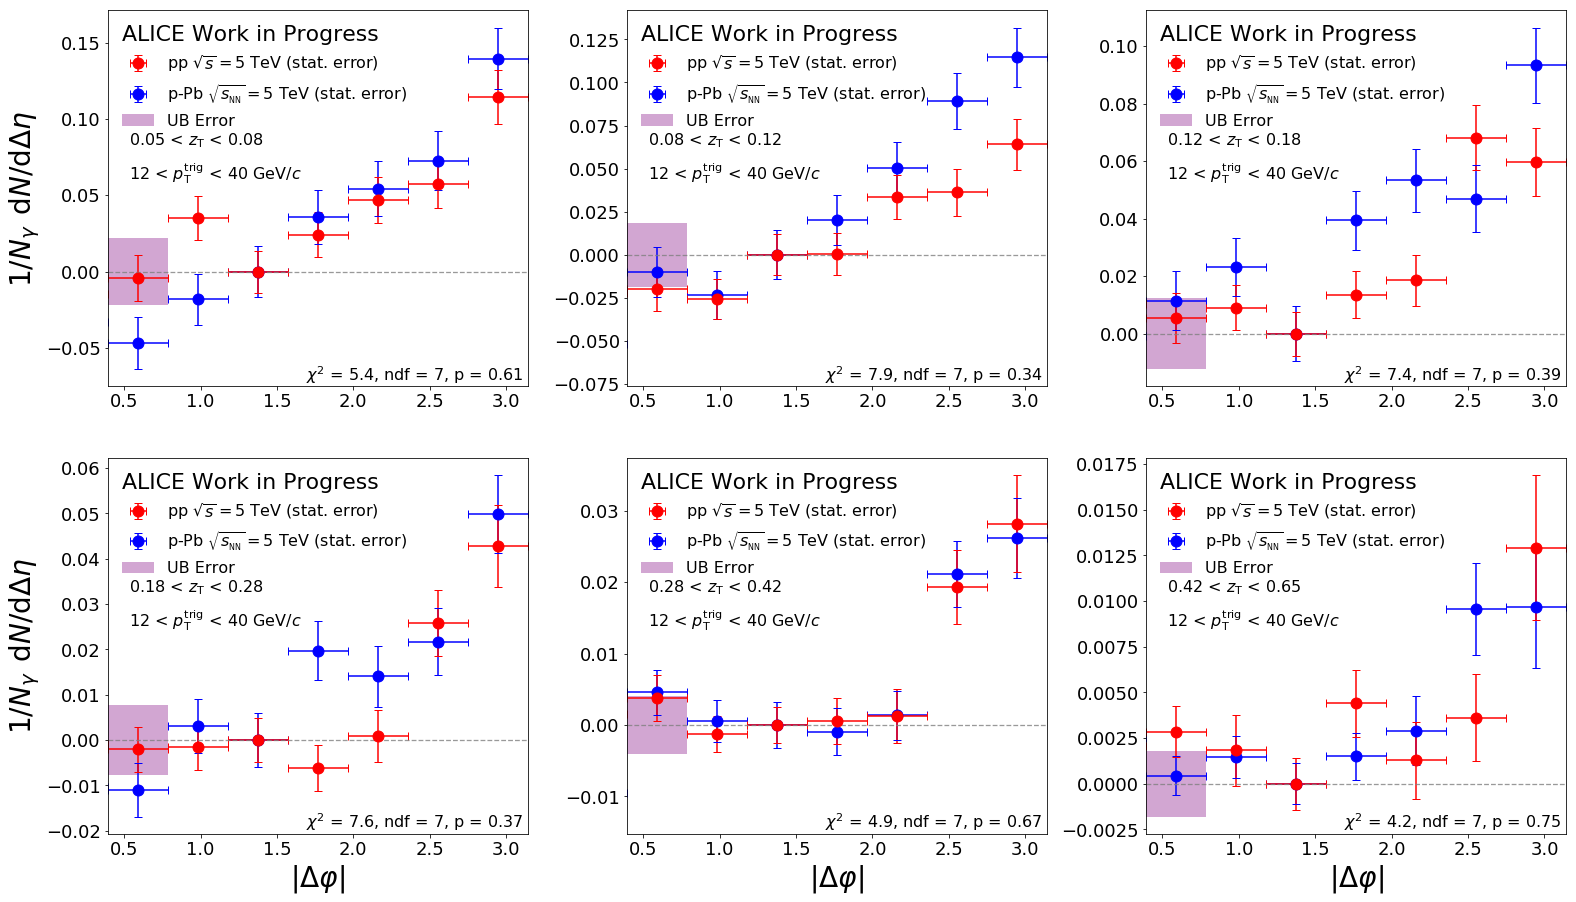

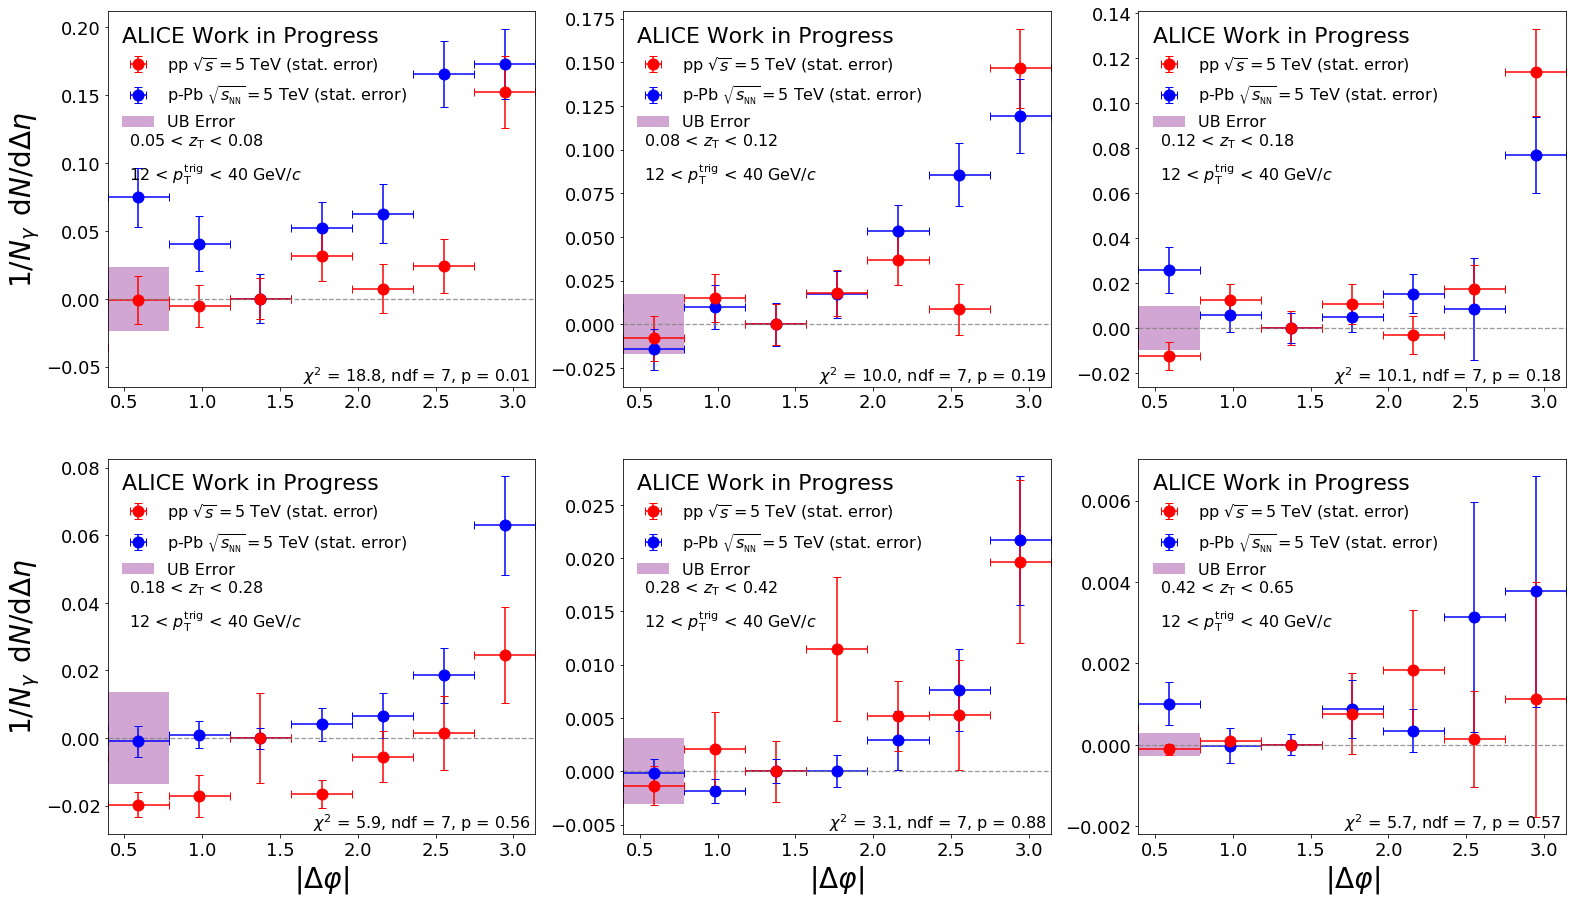

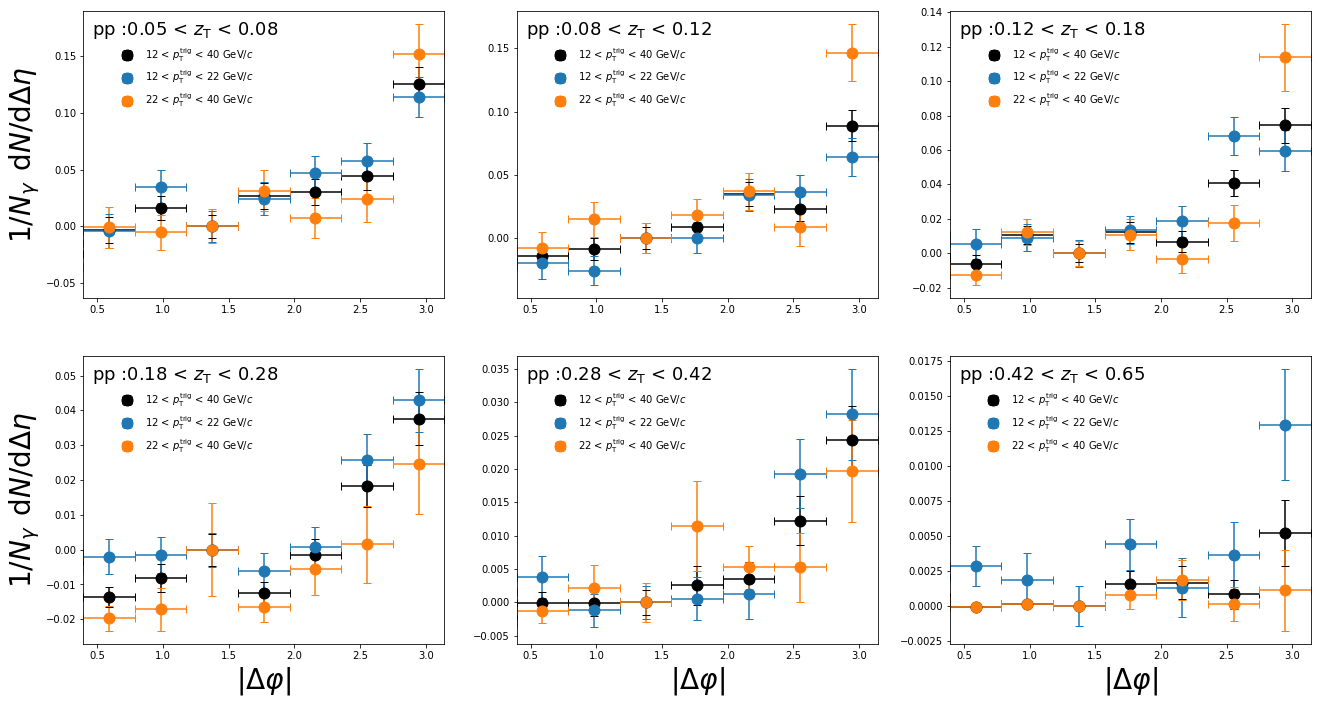

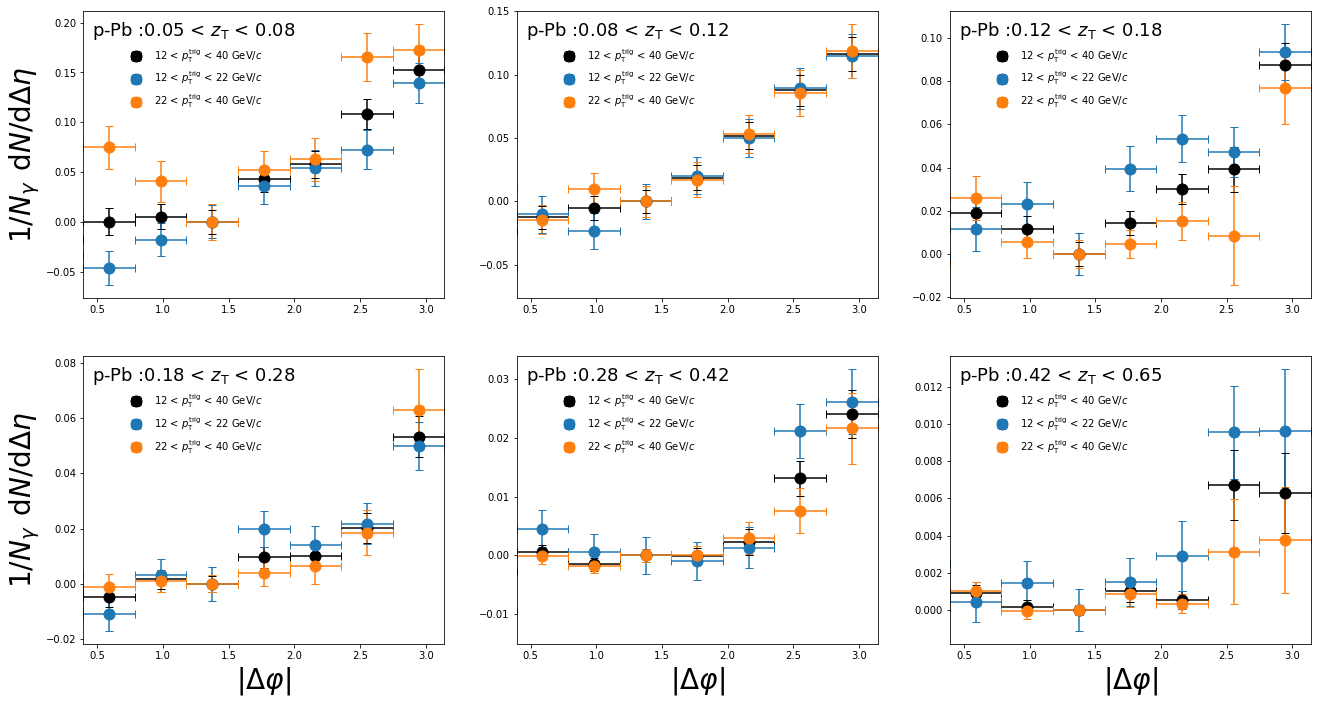

In [21]:
Ped_Sub_After_Cs(Corrs)
#print_from_Dict(Corrs)
Plot_pp_pPb_Cs(Corrs)
Compare_Cs_pTBins()


In [9]:
Start_Int = 7
N_int = N_dPhi_Bins-N_Phi_Integrate
vals = Corrs['p-Pb_CSR'][0][1][N_int:]/(dPhi_Width*N_Phi_Integrate)
val_errors = Corrs['p-Pb_CSR_Errors'][0][1][N_int:]/(dPhi_Width*N_Phi_Integrate)
UE_Error = Corrs['p-Pb_Uncorr_Error'][0][1][1]/dPhi_Width #is a scalar
Integral = np.sum(vals)
Integral_Err = math.sqrt(np.sum(val_errors**2))
print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
print(Total_Err/Integral)

0.174601 +\- 0.020163 +\- 0.036039
0.2365167578648978


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [10]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [11]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [12]:
Frags = Get_Fragmentation(Corrs)

[0.01544743 0.02979828 0.03668298 0.07273844]
[0.00025423 0.02147932 0.02310126 0.04083326]
[0.00862536 0.01180548 0.04338652 0.03797869]
[-0.00390848  0.00052665  0.01640007  0.02727428]
[0.00035282 0.00080351 0.01229018 0.01795677]
[0.00279737 0.00081884 0.00230018 0.00823177]
[-0.00137704  0.00021205  0.00166826  0.00072884]
[0.01991578 0.0047697  0.01531282 0.0969878 ]
[0.0114081  0.02343727 0.00550017 0.0933129 ]
[ 0.00686633 -0.0019986   0.01114614  0.07242031]
[-0.01056967 -0.00351912  0.00094975  0.01560567]
[0.00731641 0.00332726 0.00336358 0.01252021]
[4.86168641e-04 1.17680319e-03 8.84159275e-05 7.12580771e-04]
[0. 0. 0. 0.]
[0.02266872 0.03458212 0.04621972 0.08883877]
[0.01291153 0.03193222 0.05681663 0.07294018]
[0.02506411 0.03395903 0.02990614 0.05948403]
[0.01255458 0.00893308 0.01381857 0.03173934]
[-0.00058056  0.00085464  0.01348065  0.01666938]
[0.00095487 0.00185368 0.00607632 0.00614204]
[0.00013409 0.00068785 0.00056217 0.00148108]
[0.03331799 0.03983272 0.10523

0.16054812506443156
4.269241 +\- 0.685419 +\- 0.036039


functions_fragmentation.py:102: RuntimeWarning: invalid value encountered in divide
  Rel_Stat_Erorr = FF_Errors/FF
functions_fragmentation.py:103: RuntimeWarning: invalid value encountered in divide
  Rel_Purity_Error = purity_FF_Errors/FF
functions_fragmentation.py:132: RuntimeWarning: divide by zero encountered in double_scalars
  Combined_Errors[izt] += 1/FF_Errors[ipt][izt]**2
functions_fragmentation.py:133: RuntimeWarning: divide by zero encountered in double_scalars
  purity_Combined_Errors[izt] += 1/purity_FF_Errors[ipt][izt]**2


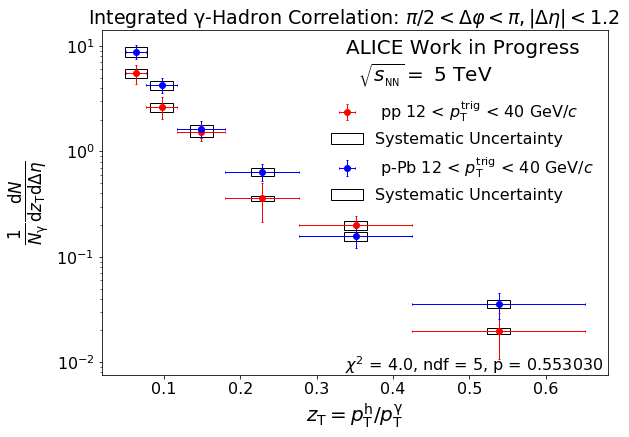

                    pp Central Values:
[5.50846442 2.64037772 1.51885811 0.3587553  0.19847363 0.01984313]

                    pp Stat. Uncertainty:
[1.14841701 0.61627037 0.2714459  0.14534819 0.04620198 0.00921133]

              pp Systematic Uncertainty:
[0.50634228 0.26001722 0.13950661 0.01809657 0.01798662 0.00141622]

                    p-Pb Central Values:
[8.81203191 4.26924116 1.64258387 0.64228189 0.15586332 0.03576165]

                    p-Pb Stat. Uncertainty:
[1.3623803  0.68541866 0.30413454 0.11596353 0.03354398 0.00993777]

              p-Pb Systematic Uncertainty:
[0.87424337 0.40467626 0.12655716 0.0598834  0.01436742 0.00275119]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 0\%-46\% & 0\%-28\% \\
\hline
Purity & 0\%-8\% & 0\%-9\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


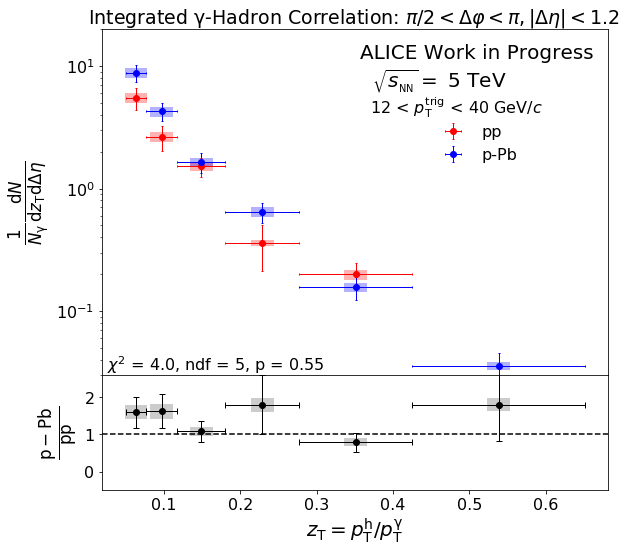

[0.01721162 0.01929723 0.02823977 0.08025245]
[0.00542167 0.02233735 0.01477972 0.05651587]
[0.00781241 0.00434738 0.02604022 0.04725039]
[-0.00798811 -0.00094099  0.01164805  0.02394244]
[0.00160771 0.00223673 0.00780609 0.0155524 ]
[0.00101144 0.00106085 0.00052537 0.00331764]
[-0.00137704  0.00021205  0.00166826  0.00072884]
[0.02753809 0.03670533 0.06893853 0.09692401]
[0.0118575  0.03293951 0.05578597 0.07407357]
[0.00921216 0.01923193 0.02491259 0.05557809]
[0.0060838  0.00651168 0.01292104 0.03385676]
[-7.38040615e-05  1.46479892e-03  8.36501240e-03  1.53599382e-02]
[0.00065317 0.00033903 0.00426447 0.00399369]
[0.00013409 0.00068785 0.00056217 0.00148108]
pp_Combined_FF_Errors:
1.1475, 0.6112, 0.2664, 0.2008, 0.0456, 0.0116, 0.0066, 

p-Pb_purity_Uncertainty:
1.3587, 0.6722, 0.2733, 0.0971, 0.0268, 0.0064, 0.0013, 

p-Pb_Combined_FF:
8.6161, 4.2629, 1.7331, 0.6157, 0.1698, 0.0408, 0.0082, 

pp_Combined_FF:
5.4295, 2.4177, 1.3595, 0.2765, 0.1839, 0.0261, 0.0035, 

pp_purity_Unce

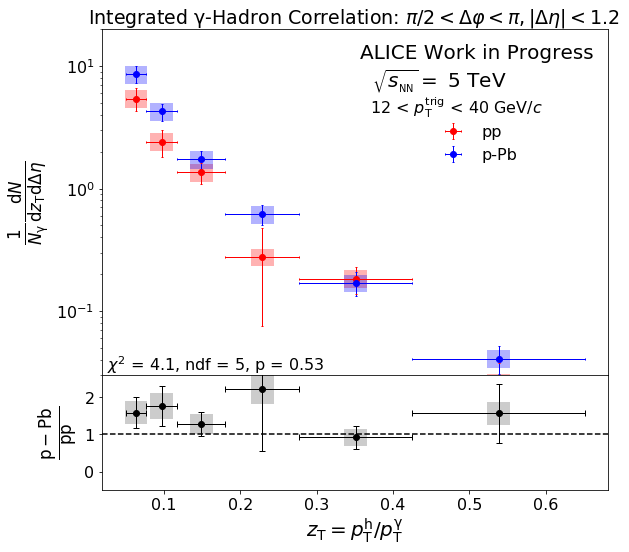

In [13]:

Combined_Frags = Average_FF(Frags)
print(Combined_Frags["p-Pb_Combined_FF_Errors"][1]/Combined_Frags["p-Pb_Combined_FF"][1])
print("%f +\- %f +\- %f"%(Combined_Frags["p-Pb_Combined_FF"][1],Combined_Frags["p-Pb_Combined_FF_Errors"][1],UE_Error))
Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
#print_from_Dict(Frags)

Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
print_from_Dict(Frags_Avg_Cs)
Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

('pp', 2.968094730802849, 8398.155678585299, 10.244772298176132)


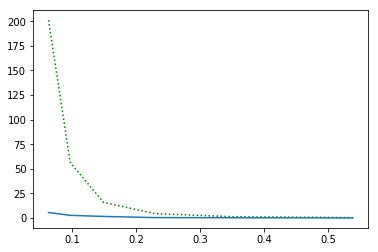

In [14]:
Fit_FF_PowerLaw(Combined_Frags)

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

[1.00124196 0.88496356 0.78009316 0.69183809 0.62725142 0.59410313
 0.59764747 0.63727251 0.70693691 0.79881983 0.90618775 1.02418218
 1.14953548 1.28008761 1.41439971 1.55149559 1.6906982  1.83152724
 1.97363457 1.1998661 ]
1.2287550267


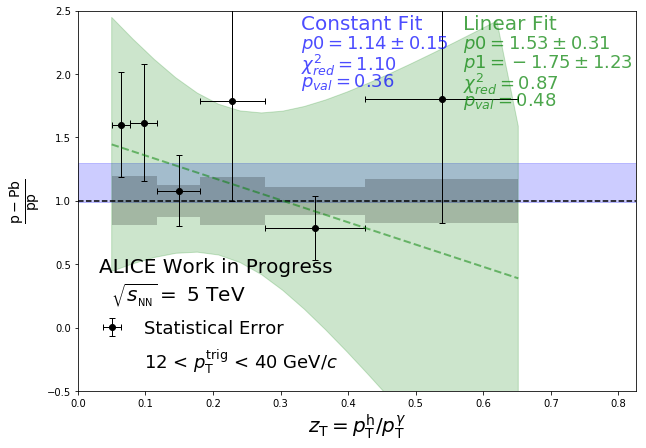

                Central Values:
[1.61690547 1.08145972 1.79030633 0.78530998 1.80221845 2.32544447]

                Ratio Uncertainty from Purity:
[0.15540861 0.09977647 0.14104513 0.09701194 0.11703342 0.        ]

                Ratio Uncertainty from Single Track Efficiency:
[0.11433248 0.07647075 0.12659377 0.0555298  0.12743609 0.16443376]

                Full Systematic Uncertainty:
[0.19293458 0.12571046 0.18952496 0.11178048 0.17302248 0.16443376]
[1.08890789 0.97051084 0.86565528 0.77982285 0.7198508  0.69249082
 0.70156878 0.74575521 0.81938989 0.91539369 1.02751559 1.1510551
 1.28271753 1.42024559 1.5620908  1.7071774  1.85474488 2.00424532
 2.15527653 1.29421741]
1.31616223852


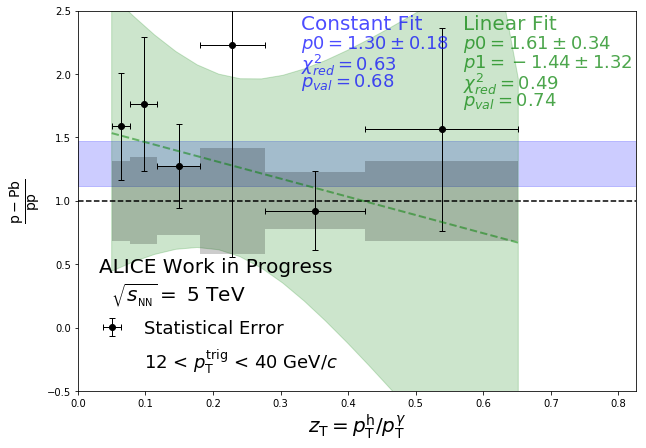

                Central Values:
[1.76323507 1.27483038 2.22693918 0.92328088 1.56380321 2.32544447]

                Ratio Uncertainty from Purity:
[0.31965614 0.25550281 0.38495609 0.21462883 0.29271164 0.39917737]

                Ratio Uncertainty from Single Track Efficiency:
[0.12467955 0.09014412 0.15746838 0.06528582 0.11057759 0.16443376]

                Full Systematic Uncertainty:
[0.34311083 0.27093845 0.41591764 0.22433852 0.31290175 0.43171869]

****************************************
Minimizer is Linear
Chi2                      =      5.51487
NDf                       =            5
p0                        =      1.14448   +/-   0.153848    

****************************************
Minimizer is Linear
Chi2                      =      3.47647
NDf                       =            4
p0                        =      1.53258   +/-   0.312346    
p1                        =     -1.75432   +/-   1.22876     

****************************************
Minimizer is Linear
C

In [16]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

pT_Rebin_1_pDevNONE
pT_Rebin_2_pDevNONE
pT_Rebin_1_pDevNONE
pT_Rebin_2_pDevNONE
pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_2_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_pDevNONE.npy


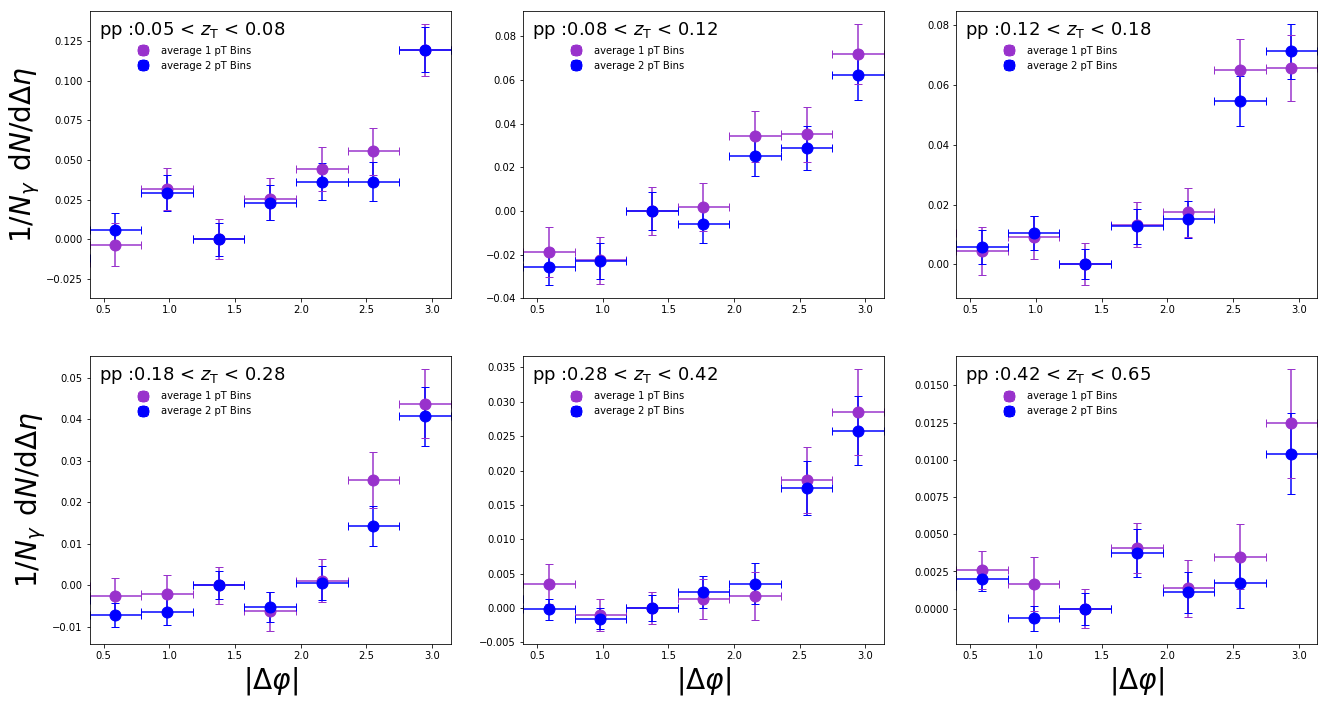

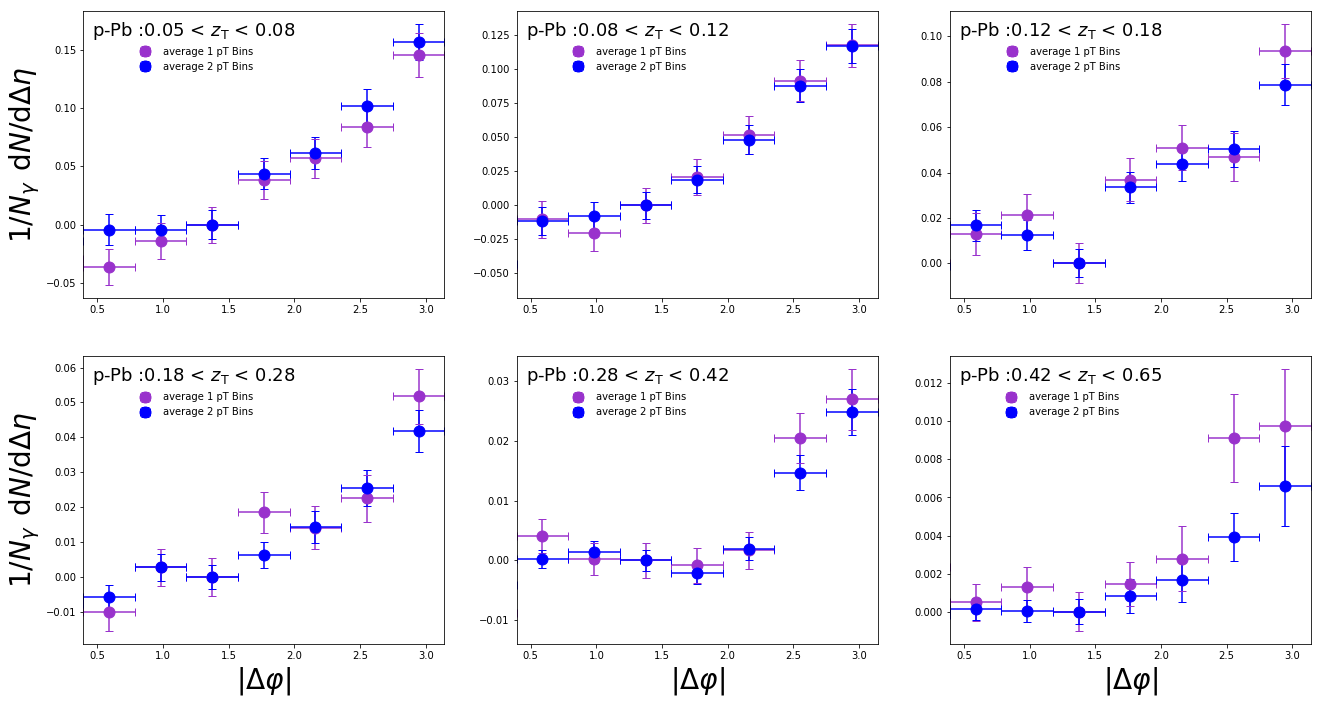

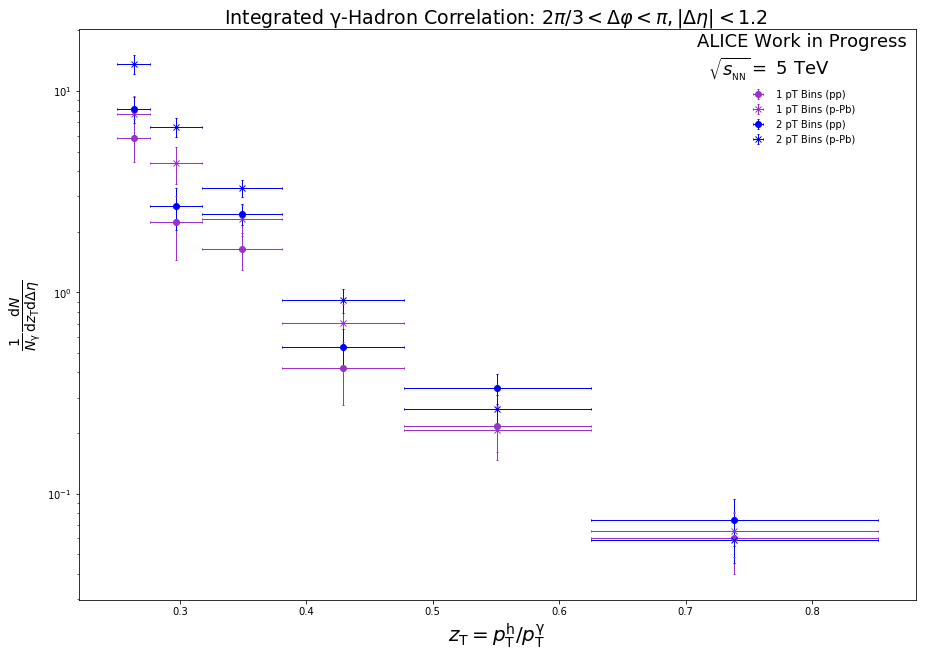

                Central Values:


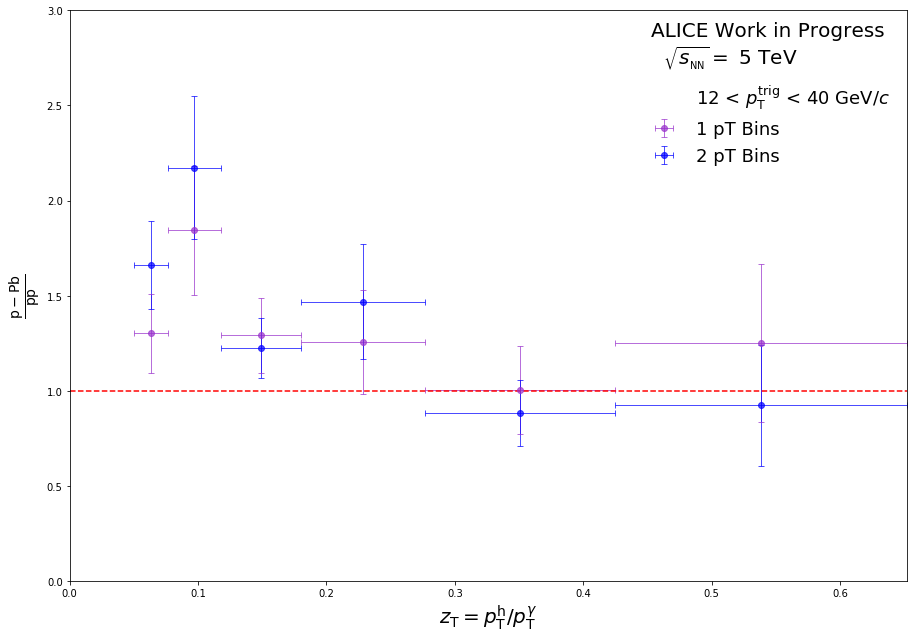

                Central Values:
[2.1735289  1.2269524  1.46956021 0.88350821 0.92337361 2.65976587]

****************************************
Minimizer is Linear
Chi2                      =      4.27221
NDf                       =            5
p0                        =      1.26834   +/-   0.116111    

****************************************
Minimizer is Linear
Chi2                      =      11.5664
NDf                       =            5
p0                        =      1.17613   +/-   0.0989879   


In [17]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

[1.00124196 0.88496356 0.78009316 0.69183809 0.62725142 0.59410313
 0.59764747 0.63727251 0.70693691 0.79881983 0.90618775 1.02418218
 1.14953548 1.28008761 1.41439971 1.55149559 1.6906982  1.83152724
 1.97363457 1.1998661 ]
1.2287550267


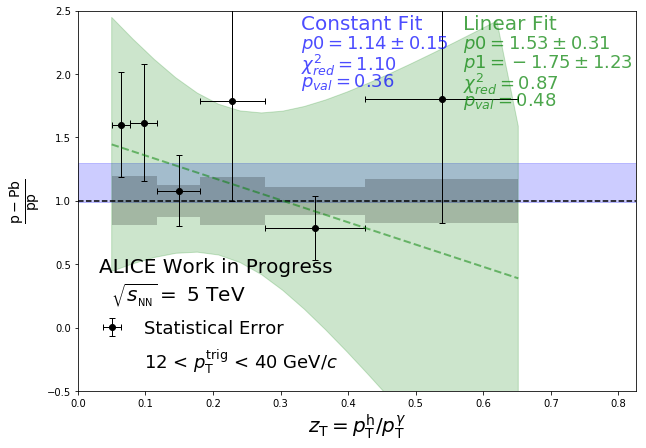

                Central Values:
[1.61690547 1.08145972 1.79030633 0.78530998 1.80221845 2.32544447]

                Ratio Uncertainty from Purity:
[0.15540861 0.09977647 0.14104513 0.09701194 0.11703342 0.        ]

                Ratio Uncertainty from Single Track Efficiency:
[0.11433248 0.07647075 0.12659377 0.0555298  0.12743609 0.16443376]

                Full Systematic Uncertainty:
[0.19293458 0.12571046 0.18952496 0.11178048 0.17302248 0.16443376]

****************************************
Minimizer is Linear
Chi2                      =      5.51487
NDf                       =            5
p0                        =      1.14448   +/-   0.153848    

****************************************
Minimizer is Linear
Chi2                      =      3.47647
NDf                       =            4
p0                        =      1.53258   +/-   0.312346    
p1                        =     -1.75432   +/-   1.22876     


In [18]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [19]:
reload(functions_fragmentation)
from functions_fragmentation import *

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
pT_Rebin_1_90p
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy


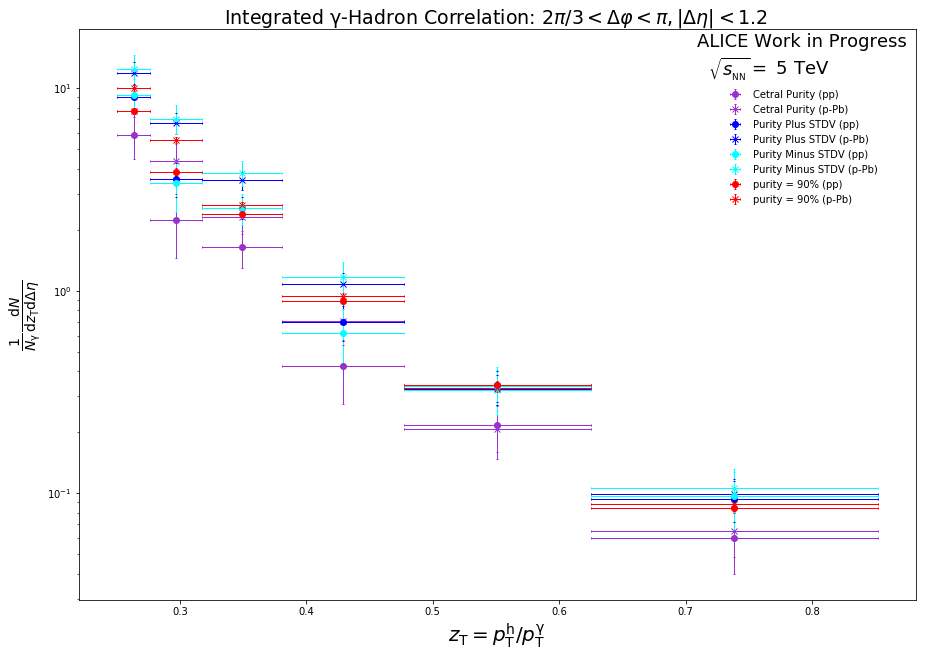

                Central Values:


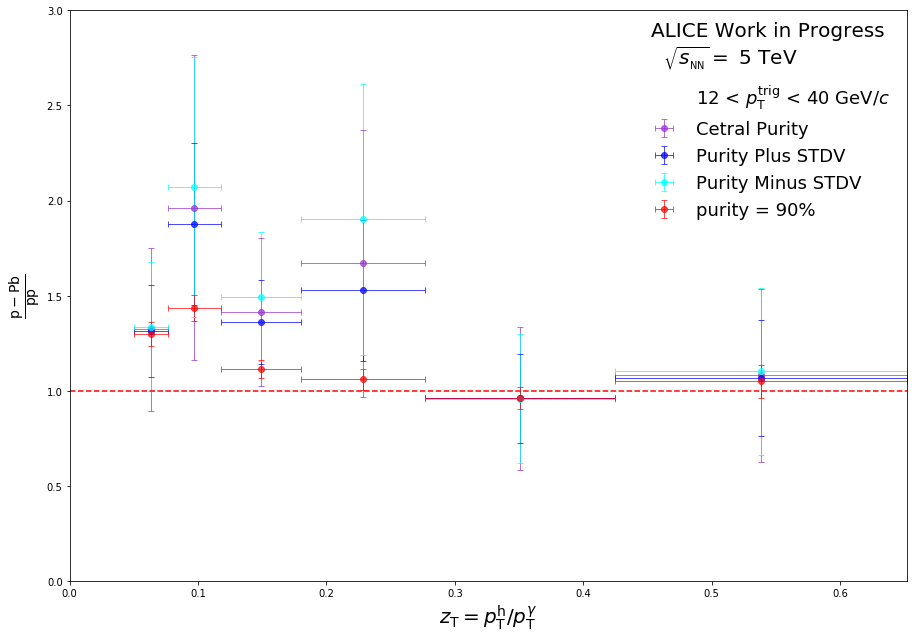

                Central Values:
[1.43467071 1.11537355 1.0607137  0.96336133 1.04910989 1.10430099]

****************************************
Minimizer is Linear
Chi2                      =      2.08262
NDf                       =            5
p0                        =      1.25918   +/-   0.212833    

****************************************
Minimizer is Linear
Chi2                      =       4.9914
NDf                       =            5
p0                        =      1.25966   +/-   0.126454    

****************************************
Minimizer is Linear
Chi2                      =      3.55471
NDf                       =            5
p0                        =      1.32233   +/-   0.193298    

****************************************
Minimizer is Linear
Chi2                      =      29.2107
NDf                       =            5
p0                        =      1.11008   +/-   0.0263325   


In [20]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)